## Exploratory Analysis

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd 


In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


### Let's check 1st file: test.csv

In [4]:
df1.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [5]:
df1.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    1000 non-null   object 
 1   season      1000 non-null   object 
 2   holiday     1000 non-null   int64  
 3   workingday  1000 non-null   int64  
 4   weather     1000 non-null   object 
 5   temp        1000 non-null   float64
 6   atemp       1000 non-null   float64
 7   humidity    1000 non-null   int64  
 8   windspeed   1000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [7]:
df1.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [8]:
df1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [9]:
df1.nunique()

datetime      1000
season           4
holiday          2
workingday       2
weather          3
temp            44
atemp           52
humidity        78
windspeed       22
dtype: int64

In [10]:
df1.describe()

,holiday,workingday,temp,atemp,humidity,windspeed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.038000,0.687000,20.419640,23.928805,62.517000,12.599249
std,0.191292,0.463946,7.734185,8.357094,19.149371,8.309897
min,0.000000,0.000000,3.280000,4.545000,16.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,48.000000,7.001500
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000
75%,0.000000,1.000000,26.240000,31.060000,78.000000,16.997900
max,1.000000,1.000000,38.540000,44.695000,100.000000,56.996900


Correlation matrix:

In [11]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_10780\128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


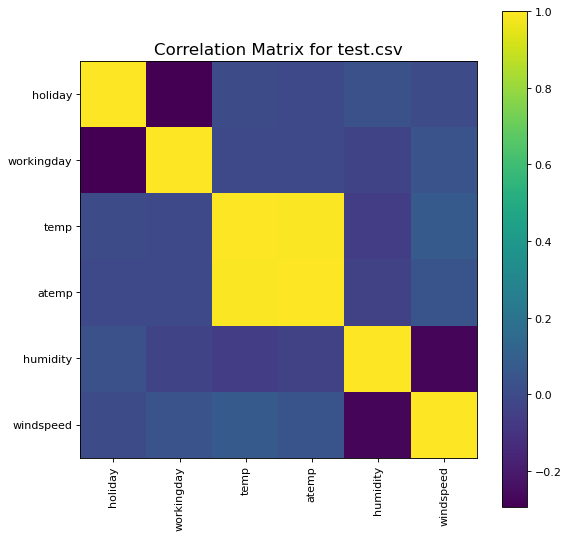

In [12]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_10780\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


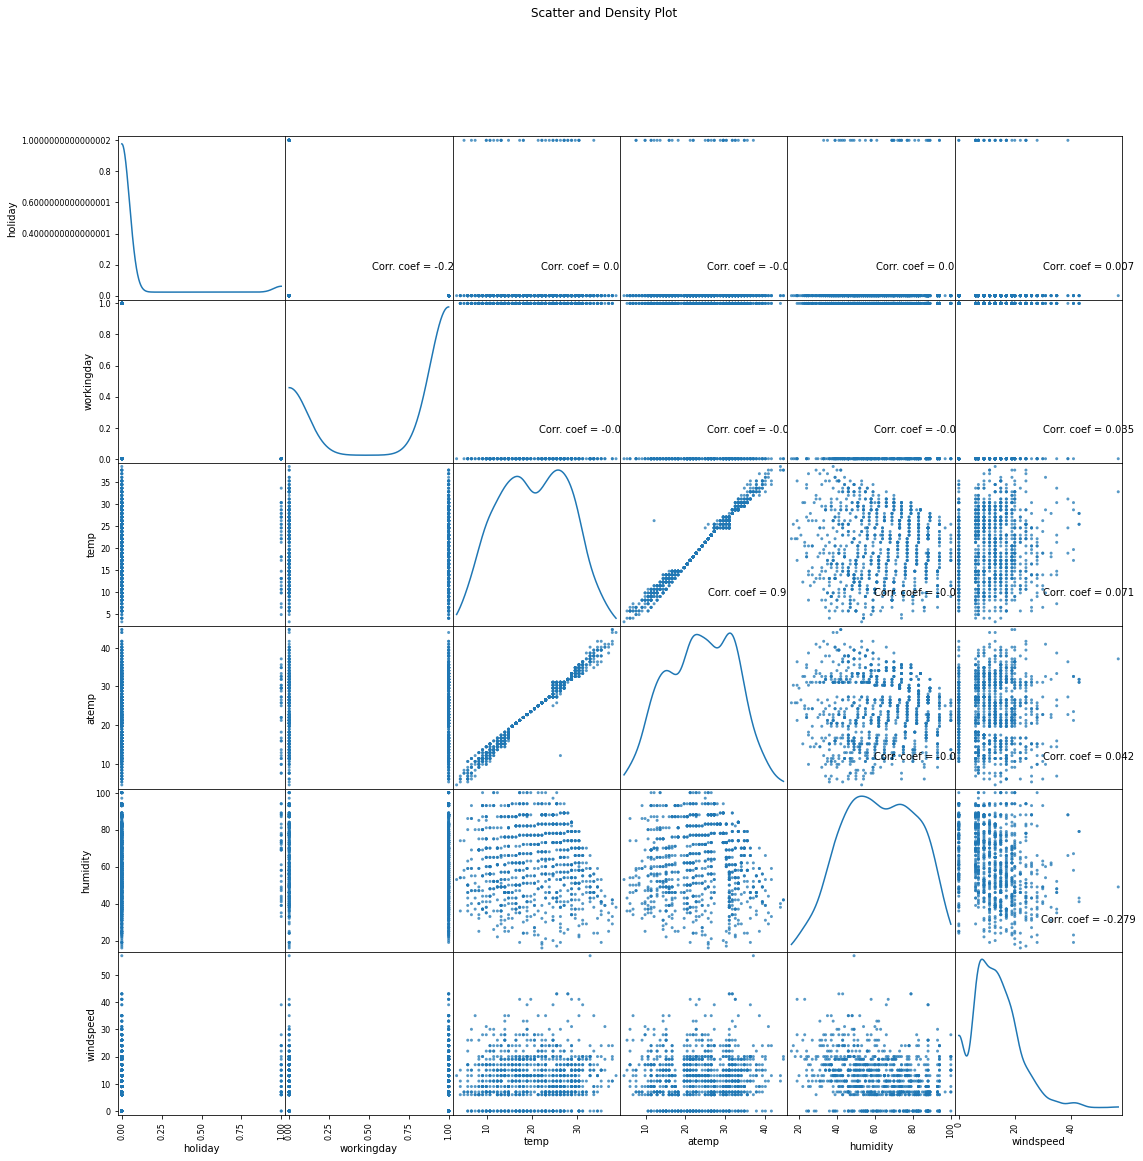

In [14]:
plotScatterMatrix(df1, 18, 10)

### Let's check 2nd file: test_label.csv

In [15]:
nRowsRead = 1000
df2 = pd.read_csv('test_label.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'test_label.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 1 columns


In [16]:
df2.head(5)

,256
0,87
1,11
2,84
3,668
4,53


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   256     1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [18]:
df2.columns

Index(['256'], dtype='object')

In [23]:
df2.dtypes

256    int64
dtype: object

In [19]:
df2.isnull().sum()

256    0
dtype: int64

In [20]:
df2.describe()

,256
count,1000.000000
mean,191.877000
std,179.910638
min,1.000000
25%,40.000000
50%,141.500000
75%,288.000000
max,852.000000


In [21]:
df2.nunique()

256    435
dtype: int64

### Let's check 3rd file: train.csv

In [25]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'train.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


In [26]:
df3.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    1000 non-null   object 
 1   season      1000 non-null   object 
 2   holiday     1000 non-null   int64  
 3   workingday  1000 non-null   int64  
 4   weather     1000 non-null   object 
 5   temp        1000 non-null   float64
 6   atemp       1000 non-null   float64
 7   humidity    1000 non-null   int64  
 8   windspeed   1000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


Correlation matrix:

In [29]:
df3.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [31]:
df3.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [32]:
df3.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [33]:
df3.describe()

,holiday,workingday,temp,atemp,humidity,windspeed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.028000,0.670000,20.507380,23.924275,61.614000,13.078306
std,0.165055,0.470448,7.557886,8.230197,19.198583,8.391942
min,0.000000,0.000000,1.640000,1.515000,0.000000,0.000000
25%,0.000000,0.000000,14.760000,17.425000,47.000000,7.001500
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000
75%,0.000000,1.000000,27.060000,31.060000,77.000000,19.001200
max,1.000000,1.000000,37.720000,43.940000,100.000000,47.998800


In [34]:
df3.nunique()

datetime      1000
season           4
holiday          2
workingday       2
weather          3
temp            43
atemp           53
humidity        77
windspeed       22
dtype: int64

C:\Users\HOME\AppData\Local\Temp\ipykernel_8112\128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


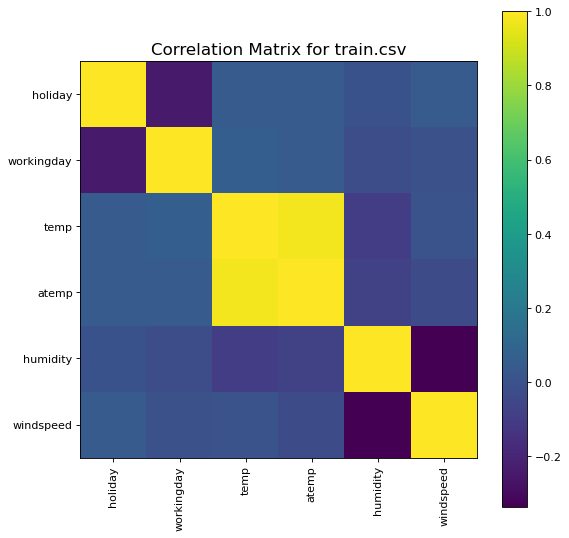

In [65]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

C:\Users\HOME\AppData\Local\Temp\ipykernel_8112\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


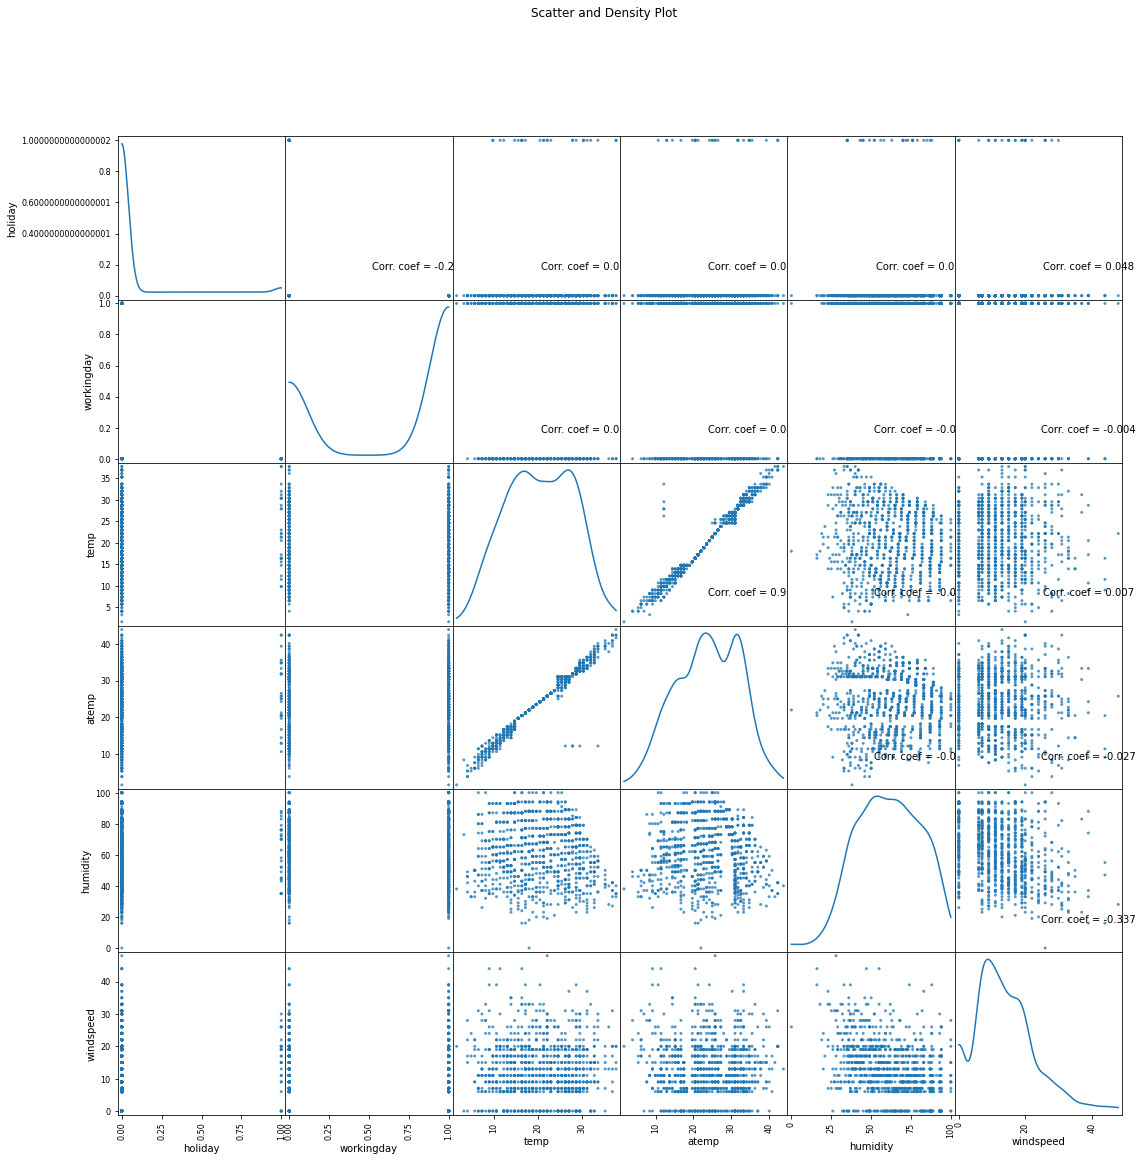

In [66]:
plotScatterMatrix(df3, 18, 10)